------------- state = work -------------
データ数 : 54294
---------- 確率の上昇値の統計量 ----------
dff max = 49.843430519104004
dff min = 1.1920928955078125e-05
dff average = 1.4629913858336259
dff 90 percentile = 1.782214641571045
---------- 確率の上昇値の分布 ----------


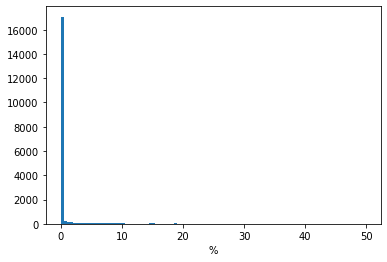

---------- ノードを取り除いた時にどの状態として認識されるかするか ----------
working --> 51149
eating --> 46
reading --> 3099
---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------


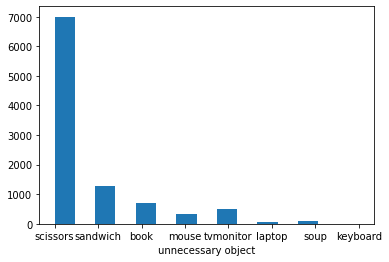

---------- 各物体の登場回数（ヒストグラム） ----------


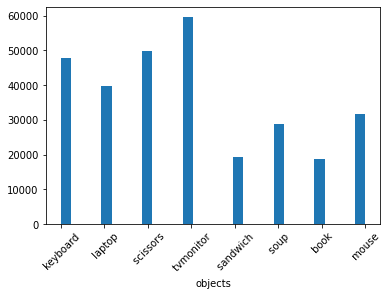

------------- state = eating -------------
データ数 : 70424
---------- 確率の上昇値の統計量 ----------
dff max = 48.71569275856018
dff min = 2.384185791015625e-05
dff average = 2.407049183307767
dff 90 percentile = 6.718396544456485
---------- 確率の上昇値の分布 ----------


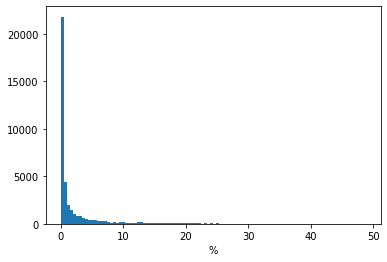

---------- ノードを取り除いた時にどの状態として認識されるかするか ----------
working --> 6680
eating --> 59936
reading --> 3808
---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------


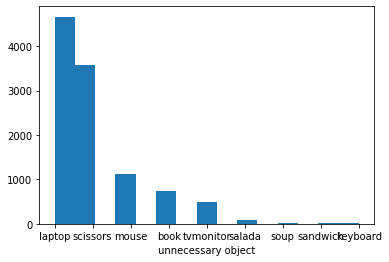

---------- 各物体の登場回数（ヒストグラム） ----------


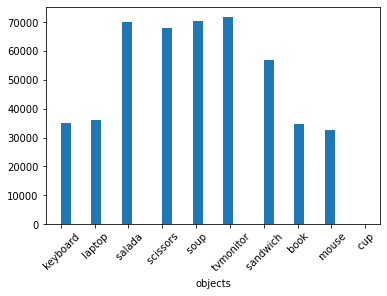

------------- state = reading -------------
データ数 : 58020
---------- 確率の上昇値の統計量 ----------
dff max = 49.936801195144646
dff min = 1.1920928955078125e-05
dff average = 0.8644398517540137
dff 90 percentile = 0.8702236413955691
---------- 確率の上昇値の分布 ----------


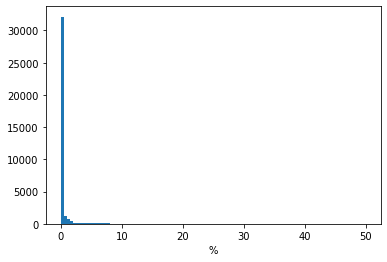

---------- ノードを取り除いた時にどの状態として認識されるかするか ----------
working --> 9676
eating --> 822
reading --> 47522
---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------


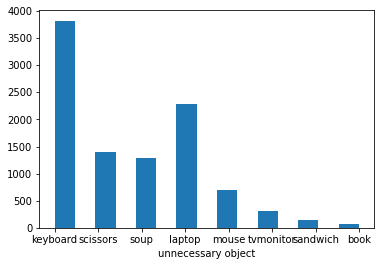

---------- 各物体の登場回数（ヒストグラム） ----------


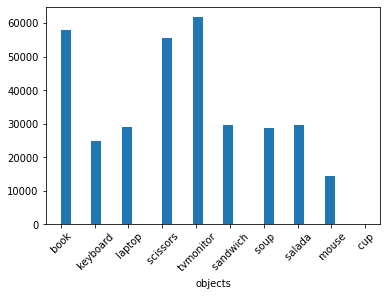

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# {0:{'bottle':'toothbrush'},
# 1:{'bottle':'scissors'},
# 2:{'bottle':'tape'},
# 3:{'bottle':'can'},
# 4:{'bottle':'wallet'},
# 5:{'bottle':'cap'},
# 6:{'bottle':'hairdryer'}}
user_name = 'nao'
obj = 'scissors'
path0 = '~/catkin_ws/src/master_project/script/experiment_data/'+user_name+'/position_data/'+obj+'_augmented_pattern_0_analyzed.csv'
path1 = '~/catkin_ws/src/master_project/script/experiment_data/'+user_name+'/position_data/'+obj+'_augmented_pattern_1_analyzed.csv'
path2 = '~/catkin_ws/src/master_project/script/experiment_data/'+user_name+'/position_data/'+obj+'_augmented_pattern_2_analyzed.csv'
path_dict = {'work':path0,'eating':path1,'reading':path2}


for state, path in path_dict.items():
    print(f'------------- state = {state} -------------')
    df = pd.read_csv(path, header=0)
    print(f'データ数 : {len(df)}')
    diff =  np.array(df['diff'].dropna())

    print('---------- 確率の上昇値の統計量 ----------')
    diff_average = diff.mean()
    print(f'dff max = {diff.max()}')
    print(f'dff min = {diff.min()}')
    print(f'dff average = {diff.mean()}')
    print(f'dff 90 percentile = {np.percentile(diff, 90)}')
    
    print('---------- 確率の上昇値の分布 ----------')
    plt.hist(diff, bins=100)
    plt.xlabel('%')
    plt.show()
    
    print('---------- ノードを取り除いた時にどの状態として認識されるかするか ----------')
    print(f"working --> {len(df[df['dummy_state']=='working'])}")
    print(f"eating --> {len(df[df['dummy_state']=='eating'])}")
    print(f"reading --> {len(df[df['dummy_state']=='reading'])}")
    
    print('---------- 物体別の片付け対象と判定された頻度（ヒストグラム） ----------')
    is_unnecessary_df = df[df['is_unnecessary']==True]
    plt.hist(list(is_unnecessary_df['removed_obj']), bins=15)
    plt.xlabel('unnecessary object')
    plt.show()
    
    print('---------- 各物体の登場回数（ヒストグラム） ----------')
    obj_4_real = ["face", "tvmonitor", "laptop", "mouse", "keyboard", "book", "banana", "apple", "orange", "pizza","cup"]
    obj_4_marker = ['toast', 'sandwitch', 'cereal', 'scrambled egg', 'soup', 'salada', 'donut']
    obj_list = obj_4_real+obj_4_marker
    all_obj = []
    for objects in df['objects']:
        objects = objects.replace('[','').replace(']','').replace("'",'').replace("face,",'').split(",")
        objects.sort()
        all_obj += objects
    plt.hist(all_obj, bins=30)
    plt.xticks(rotation=45)
    plt.xlabel('objects')
    plt.show()
            

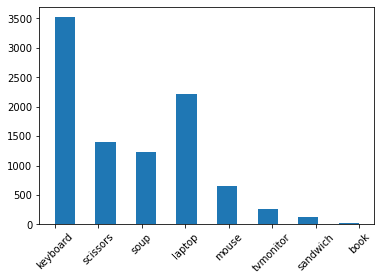

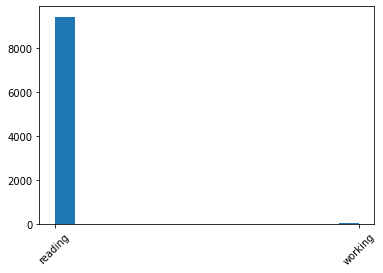

In [66]:
import pandas as pd
import numpy as np

columun_names= ['dataID', 'state', 'probability', "objects", 'removed_obj', 'dummy_state', 'dummy_probability', 'state_match', 'run_up', 'diff', 'is_unnecessary']
 
data_type_list = ['row', 'row_augmented','recognition_augmented']
pattern_dict = {'working':0, 'eating':1, 'reading':2}
 
_obj = 'scissors'
pattern = pattern_dict['reading']

df = pd.read_csv('~/catkin_ws/src/master_project/script/experiment_data/nao/position_data/'+_obj+'_augmented_pattern_'+str(pattern)+'_analyzed.csv', index_col=0)
# df = _df.dropna()

# print(len(df))
# df.iloc[[0,2,3,4]]
# df.head()
true_candidate_list = []
for idx, row in enumerate(df.itertuples()):
    idx = row[0]
    prob = row[columun_names.index('probability')+1]
    prob = list(map(float,prob.replace('[','').replace(']','').split(',')))
    objects = row[columun_names.index('objects')+1]
    objects = objects.replace('[','').replace(']','').replace("'",'').replace(" ",'').split(',')
    if not _obj in objects:
        continue
    state_match = row[columun_names.index('state_match')+1]
    diff = float(row[columun_names.index('diff')+1])
    is_unnecessary = row[columun_names.index('is_unnecessary')+1]
    run_up = row[columun_names.index('run_up')+1]
    if (max(prob) > 0.8) and state_match and run_up and is_unnecessary:
        true_candidate_list.append(idx)
len(true_candidate_list)
# print(true_candidate_list)
# list(df.iloc[true_candidate_list]['removed_obj'])
plt.xticks(rotation=45)
plt.hist(list(df.iloc[true_candidate_list]['removed_obj']), bins=15)
plt.show()

plt.xticks(rotation=45)
plt.hist(list(df.iloc[true_candidate_list]['state']), bins=15)
plt.show()

In [31]:

# 不要判定された物体、回数、確率上昇平均を確認する
diff_dict_each_obj = {}
for _, row in enumerate(df.itertuples()):
   removed_obj = row[columun_names.index('removed_obj')+1]
   diff = row[columun_names.index('diff')+1]
   # state = row[columun_names.index('state')+1]
   try:
       diff_dict_each_obj[removed_obj].append(diff)
   except KeyError:
       diff_dict_each_obj[removed_obj] = [diff]
 
print('不要物体, 不要判定回数, 確率上昇平均')
for obj, diff_list in diff_dict_each_obj.items():
   print(f'{obj}, {len(diff_list)}, {np.array(diff_list).mean()}')
# diff_dict_each_obj
 
# objが不要判定されたときのdataIDと認識状態を確認する
obj = 'laptop'
df[df['removed_obj']==obj][['dataID','state','objects']]
 



不要物体, 不要判定回数, 確率上昇平均
bottle, 9645, nan
tvmonitor, 11546, nan
laptop, 7252, nan
keyboard, 8957, nan
sandwich, 3114, nan
soup, 5151, nan
mouse, 5383, nan
book, 3246, nan


,dataID,state,objects
2,164291978228,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'key..."
5,164291988971,working,"['face', 'tvmonitor', 'laptop', 'keyboard', 's..."
11,164291996838,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'mou..."
18,164291983368,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'key..."
22,164291995597,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'key..."
...,...,...,...
54269,164291984519,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'key..."
54277,164291977574,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'key..."
54281,164291979729,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'key..."
54286,164291986755,working,"['face', 'bottle', 'tvmonitor', 'laptop', 'mou..."
